In [ ]:
import os
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
DATADIR = os.path.join(MOUNTPOINT, 'My Drive', 'waste-classification')
drive.mount(MOUNTPOINT)

Mounted at /content/gdrive


In [23]:
!pip install datasets requests jupyter numpy pandas matplotlib seaborn Cython pycocotools scikit-learn torch torchvision transformers tqdm tensorboard squarify

In [9]:
import csv
import datasets
from datasets import load_dataset, DownloadConfig
from PIL import Image
import requests
from io import BytesIO


# Define paths
dataset_name = "viola77data/recycling-dataset"
base_dir = "viola_dataset"
images_dir = os.path.join(base_dir, "images")
annotations_file = os.path.join(base_dir, "annotations.csv")

# Load dataset
dataset = load_dataset(dataset_name)

# Create directories
os.makedirs(images_dir, exist_ok=True)

# Open CSV file to store annotations
with open(annotations_file, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["image_path", "label"])

    # Iterate through dataset
    for idx, data in enumerate(dataset):
        if "image" not in data or "label" not in data:
            print(f"Skipping entry {idx} due to missing keys.")
            continue

        image_data = data["image"]
        label = data["label"]

        # If images are URLs, download them
        if isinstance(image_data, str):
            response = requests.get(image_data)
            image = Image.open(BytesIO(response.content))
        else:
            image = image_data  # Already a PIL Image

        # Save image
        image_path = os.path.join(images_dir, f"image_{idx}.jpg")
        image.save(image_path)

        # Write annotation
        writer.writerow([image_path, label])

print(f"Images saved in: {images_dir}")
print(f"Annotations saved in: {annotations_file}")


Resolving data files:   0%|          | 0/3107 [00:00<?, ?it/s]

Skipping entry 0 due to missing keys.
Images saved in: viola_dataset/images
Annotations saved in: viola_dataset/annotations.csv


In [10]:
# Define paths
dataset_name = "viola77data/recycling-dataset"
base_dir = "viola_dataset"
images_dir = os.path.join(base_dir, "images")
annotations_file = os.path.join(base_dir, "annotations.csv")

# Load dataset
dataset = load_dataset(dataset_name, split="train")

# Create directories
os.makedirs(images_dir, exist_ok=True)

# Open CSV file to store annotations
with open(annotations_file, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["image_path", "label"])

    # Iterate through dataset
    for idx, data in enumerate(dataset):
        if "image" not in data or "label" not in data:
            print(f"Skipping entry {idx} due to missing keys.")
            continue

        image_data = data["image"]
        label = data["label"]

        # If images are URLs, download them
        if isinstance(image_data, str):
            # Increase the timeout for downloading individual images
            response = requests.get(image_data, timeout=60)
            image = Image.open(BytesIO(response.content))
        else:
            image = image_data  # Already a PIL Image

        # Save image
        image_path = os.path.join(images_dir, f"image_{idx}.jpg")
        image.save(image_path)

        # Write annotation
        writer.writerow([image_path, label])

print(f"Images saved in: {images_dir}")
print(f"Annotations saved in: {annotations_file}")

Resolving data files:   0%|          | 0/3107 [00:00<?, ?it/s]

Images saved in: viola_dataset/images
Annotations saved in: viola_dataset/annotations.csv


Dataset Summary:
Total Images: 3107
Number of Classes: 11
                Class  Count
10      takeaway_cups    300
1           batteries    297
4               glass    294
8         polystyrene    291
6         paper_towel    291
9       soft_plastics    283
5        hard_plastic    280
2           cardboard    274
3   disposable_plates    273
0           aluminium    269
7               paper    255


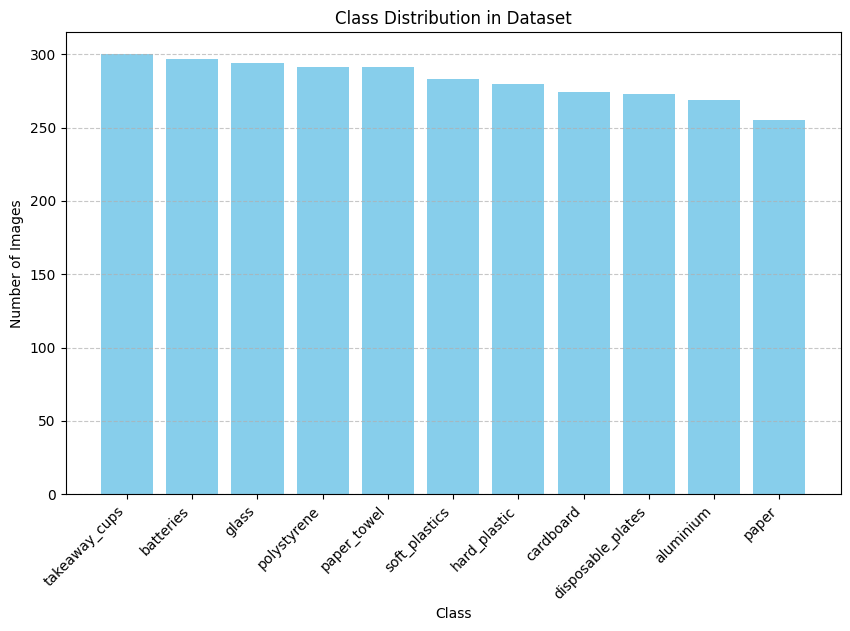

Updated annotations saved to: viola_dataset/annotations_updated.csv
Class distribution plot saved to: viola_dataset/class_distribution.png


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import cv2
import random
import squarify

# Paths
base_dir = "viola_dataset"
images_dir = os.path.join(base_dir, "images")
annotations_file = os.path.join(base_dir, "annotations.csv")

# Class mapping
class_mapping = {
    0: "aluminium",
    1: "batteries",
    2: "cardboard",
    3: "disposable_plates",
    4: "glass",
    5: "hard_plastic",
    6: "paper",
    7: "paper_towel",
    8: "polystyrene",
    9: "soft_plastics",
    10: "takeaway_cups",
}

# Load annotations
df = pd.read_csv(annotations_file)

# Check if required columns exist
if "image_path" not in df.columns or "label" not in df.columns:
    raise ValueError("CSV file must contain 'image_path' and 'label' columns.")

# Ensure labels are integers before mapping
df["label"] = df["label"].astype(int)

# Create a new column with mapped class names
df["class_name"] = df["label"].map(class_mapping)

# Save the updated CSV file
updated_annotations_file = os.path.join(base_dir, "annotations_updated.csv")
df.to_csv(updated_annotations_file, index=False)

# Count occurrences of each class
class_counts = Counter(df["class_name"])

# Convert to DataFrame for sorting and analysis
df_counts = pd.DataFrame(class_counts.items(), columns=["Class", "Count"])
df_counts = df_counts.sort_values(by="Count", ascending=False)

# Print dataset statistics
total_images = len(df)
num_classes = len(class_counts)

print("Dataset Summary:")
print(f"Total Images: {total_images}")
print(f"Number of Classes: {num_classes}")
print(df_counts)

# Plot class distribution
plt.figure(figsize=(10, 6))
plt.bar(df_counts["Class"], df_counts["Count"], color="skyblue")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Dataset")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save plot
plot_path = os.path.join(base_dir, "class_distribution.png")
plt.savefig(plot_path, bbox_inches="tight")
plt.show()

print(f"Updated annotations saved to: {updated_annotations_file}")
print(f"Class distribution plot saved to: {plot_path}")


[['viola_dataset/images/image_1710.jpg', 'paper_towel'], ['viola_dataset/images/image_2431.jpg', 'polystyrene'], ['viola_dataset/images/image_2179.jpg', 'paper'], ['viola_dataset/images/image_393.jpg', 'batteries'], ['viola_dataset/images/image_653.jpg', 'cardboard'], ['viola_dataset/images/image_2205.jpg', 'paper'], ['viola_dataset/images/image_778.jpg', 'cardboard'], ['viola_dataset/images/image_2283.jpg', 'polystyrene'], ['viola_dataset/images/image_1916.jpg', 'paper_towel'], ['viola_dataset/images/image_684.jpg', 'cardboard'], ['viola_dataset/images/image_2548.jpg', 'soft_plastics'], ['viola_dataset/images/image_1877.jpg', 'paper_towel'], ['viola_dataset/images/image_1533.jpg', 'hard_plastic'], ['viola_dataset/images/image_1351.jpg', 'glass'], ['viola_dataset/images/image_2466.jpg', 'polystyrene'], ['viola_dataset/images/image_1828.jpg', 'paper_towel'], ['viola_dataset/images/image_35.jpg', 'aluminium'], ['viola_dataset/images/image_2921.jpg', 'takeaway_cups'], ['viola_dataset/imag

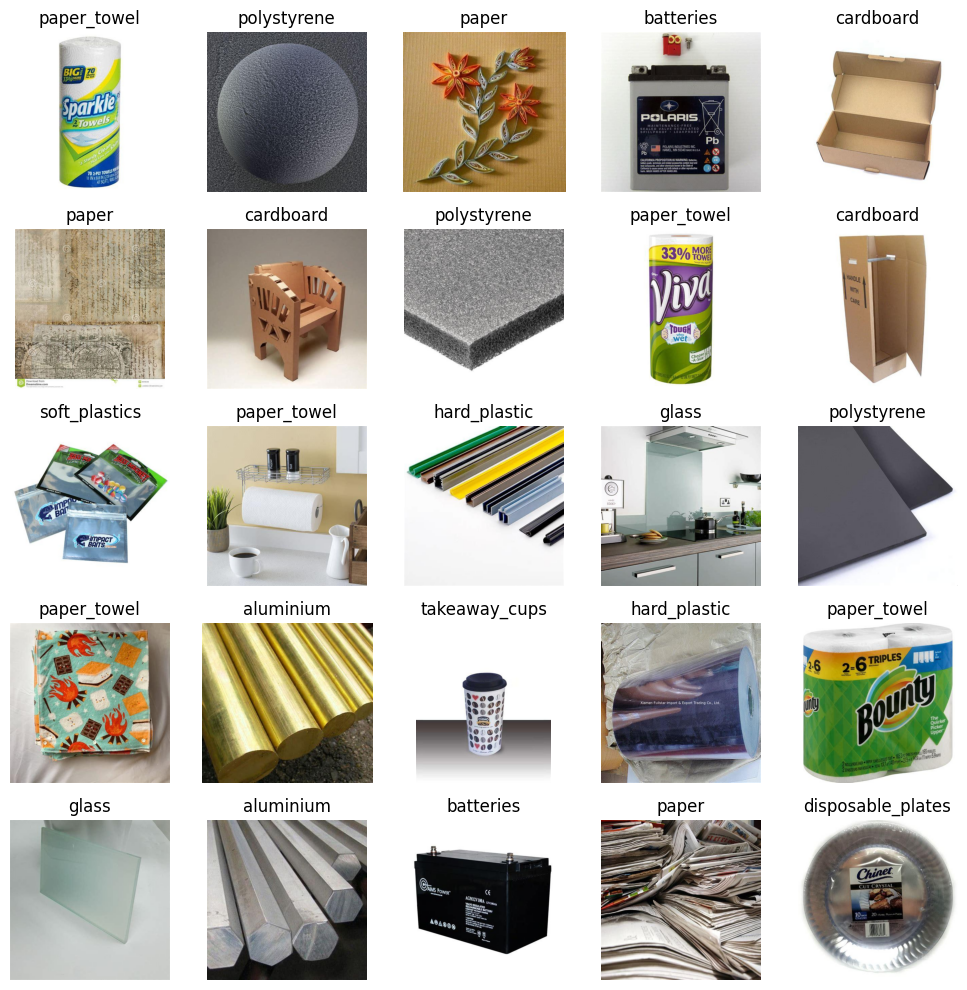

In [12]:
train_df = pd.read_csv(os.path.join(base_dir, 'train.csv'))

num_images = 25
random_indices = random.sample(range(len(train_df)), num_images)
original_images = [train_df.iloc[i][['image_path', 'class_name']].tolist() for i in random_indices]
print(original_images[:])

original_images_pil = [Image.open(img[0]).convert("RGB") for img in original_images]

# Create a 5x5 grid
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        idx = i * 5 + j  # Image index
        axes[i, j].imshow(original_images_pil[idx])
        axes[i, j].set_title(original_images[idx][1])
        axes[i, j].axis("off")

plt.tight_layout()
plt.show()

In [15]:
import torch
from torchvision import transforms


# Data augmentation RANDOM

train_transform = transforms.Compose([
    transforms.RandomChoice([  # Randomly apply ONE transformation
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Random crop & resize
        transforms.RandomHorizontalFlip(p=0.5),  # Always flip horizontally (when chosen)
        transforms.RandomRotation(degrees=15),  # Rotate randomly
        transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),  # Color changes
        transforms.GaussianBlur(kernel_size=3),  # Blurring effect
    ]),
    transforms.Resize((224, 224)),  # Resize to match model input
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])



[['viola_dataset/images/image_1710.jpg', 'paper_towel'], ['viola_dataset/images/image_2431.jpg', 'polystyrene'], ['viola_dataset/images/image_2179.jpg', 'paper'], ['viola_dataset/images/image_393.jpg', 'batteries'], ['viola_dataset/images/image_653.jpg', 'cardboard'], ['viola_dataset/images/image_2205.jpg', 'paper'], ['viola_dataset/images/image_778.jpg', 'cardboard'], ['viola_dataset/images/image_2283.jpg', 'polystyrene'], ['viola_dataset/images/image_1916.jpg', 'paper_towel'], ['viola_dataset/images/image_684.jpg', 'cardboard'], ['viola_dataset/images/image_2548.jpg', 'soft_plastics'], ['viola_dataset/images/image_1877.jpg', 'paper_towel'], ['viola_dataset/images/image_1533.jpg', 'hard_plastic'], ['viola_dataset/images/image_1351.jpg', 'glass'], ['viola_dataset/images/image_2466.jpg', 'polystyrene'], ['viola_dataset/images/image_1828.jpg', 'paper_towel'], ['viola_dataset/images/image_35.jpg', 'aluminium'], ['viola_dataset/images/image_2921.jpg', 'takeaway_cups'], ['viola_dataset/imag

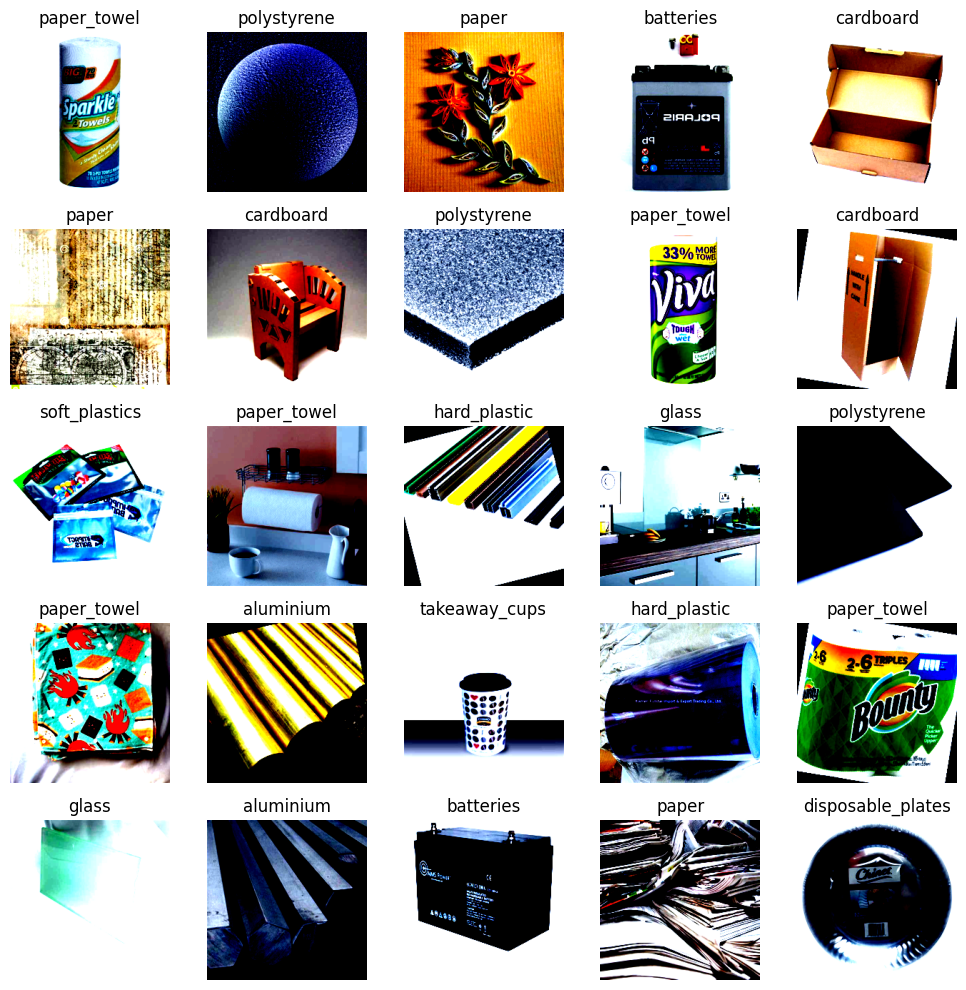

In [16]:
transformed_images = [(train_df.iloc[i]['image_path'], train_df.iloc[i]['class_name']) for i in random_indices]
print(original_images[:])

transformed_images_pil = [train_transform(Image.open(img[0]).convert("RGB")) for img in transformed_images]

# Create a 5x5 grid
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        idx = i * 5 + j  # Image index
        axes[i, j].imshow(transformed_images_pil[idx].permute(1, 2, 0)) # Permute to (H, W, C)
        axes[i, j].set_title(transformed_images[idx][1])
        axes[i, j].axis("off")

plt.tight_layout()
plt.show()

In [26]:
train_df.head(20)

,image_path,label,class_name
0,viola_dataset/images/image_2491.jpg,8,polystyrene
1,viola_dataset/images/image_1040.jpg,3,disposable_plates
2,viola_dataset/images/image_2387.jpg,8,polystyrene
3,viola_dataset/images/image_1183.jpg,4,glass
4,viola_dataset/images/image_963.jpg,3,disposable_plates
5,viola_dataset/images/image_2255.jpg,8,polystyrene
6,viola_dataset/images/image_561.jpg,1,batteries
7,viola_dataset/images/image_750.jpg,2,cardboard
8,viola_dataset/images/image_747.jpg,2,cardboard
9,viola_dataset/images/image_1425.jpg,5,hard_plastic
